# Coverage Distribution plot

In [1]:
import pymc as pm
import formulaic
import pandas as pd
import numpy as np

import pandas as pd

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")
data.head()

model_formula = 'Coverage ~ 0 + C(TargetModule)'
model_spec = formulaic.model_matrix(model_formula, data=data)

model_spec.rhs.iloc[:, :20]

,C(TargetModule)[T.codetiming._timer],C(TargetModule)[T.flutils.decorators],C(TargetModule)[T.flutils.namedtupleutils],C(TargetModule)[T.flutils.packages],C(TargetModule)[T.flutils.setuputils.cmd],C(TargetModule)[T.httpie.output.formatters.headers],C(TargetModule)[T.httpie.plugins.base],C(TargetModule)[T.mimesis.builtins.da],C(TargetModule)[T.py_backwards.transformers.base],C(TargetModule)[T.py_backwards.transformers.dict_unpacking],C(TargetModule)[T.py_backwards.transformers.return_from_generator],C(TargetModule)[T.py_backwards.transformers.yield_from],C(TargetModule)[T.py_backwards.utils.helpers],C(TargetModule)[T.pymonet.immutable_list],C(TargetModule)[T.pymonet.maybe],C(TargetModule)[T.pymonet.validation],C(TargetModule)[T.pypara.accounting.journaling],C(TargetModule)[T.pytutils.lazy.lazy_import],C(TargetModule)[T.pytutils.python],C(TargetModule)[T.sanic.config]
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9356,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9357,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9358,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
with pm.Model() as model:
    # Priors for the global intercept
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    
    # Standard deviation across groups
    sigma = pm.Exponential('sigma', 1)
    
    # Group-specific intercepts
    a_m = pm.Normal('a_m', mu=a_bar, sigma=sigma, shape=model_spec.rhs.shape[1])
    
    # Deterministic transformations for logit(pi)
    logit_p = pm.math.dot(model_spec.rhs, a_m)
    
    # Link function - logistic
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))
    
    # Gamma distribution for theta - dispersion parameter
    theta = pm.Gamma('theta', alpha=2, beta=0.5)  # adjust alpha, beta to reflect your prior knowledge
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Beta('Y_obs', alpha=p*theta, beta=(1-p)*theta, observed=model_spec.lhs['Coverage'])
    
    # Sample from the model
    trace = pm.sample(1000, chains=4, return_inferencedata=True, progressbar=True)

print("Model building complete.")

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


KeyboardInterrupt: 

Sampling: [Y_obs, a_bar, a_m, phi, sigma]


<xarray.DataArray 'p' (chain: 1, draw: 10000)>
array([[0.43280935, 0.38205581, 0.39759472, ..., 0.38172708, 0.48191102,
        0.50599041]])
Coordinates:
  * chain    (chain) int64 0
  * draw     (draw) int64 0 1 2 3 4 5 6 7 ... 9993 9994 9995 9996 9997 9998 9999


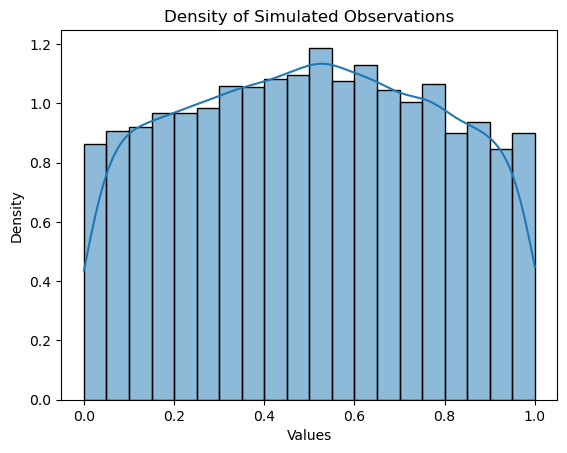

In [90]:
import pymc as pm
import matplotlib.pyplot as plt
import seaborn as sns

with pm.Model() as model:
    # Priors for the global intercept
    a_bar = pm.Normal('a_bar', mu=0, sigma=0.50)
    
    # Standard deviation across groups
    sigma = pm.Exponential('sigma', 5)
    
    # Group-specific intercepts
    a_m = pm.Normal('a_m', mu=a_bar, sigma=sigma)
    
    # Link function - logistic
    p = pm.Deterministic('p', pm.math.invlogit(a_m))
    
    # Gamma distribution for theta - dispersion parameter
    phi = pm.Exponential('phi', 1)
    theta = pm.Deterministic('theta', phi + 2)  # adjust alpha, beta to reflect your prior knowledge
    #theta = pm.Gamma('theta', alpha=4, beta=1)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Beta('Y_obs', alpha=p*theta, beta=(1-p)*theta)
    
    # Sample from the model
    #trace = pm.sample(1000, chains=4, return_inferencedata=True, progressbar=True)
    idata = pm.sample_prior_predictive(samples=10000)


prior_p = idata.prior['p']
print(prior_p)
prior_theta = idata.prior['theta']

simulated_observations = np.random.beta(a=prior_p * prior_theta, b=(1 - prior_p) * prior_theta)



# Plotting
sns.histplot(simulated_observations.flatten(), bins=np.arange(0, 1.05, 0.05), kde=True, stat='density')
plt.title('Density of Simulated Observations')
plt.xlabel('Values')
plt.ylabel('Density')
plt.show()


In [11]:
import pymc as pm
import formulaic
import pandas as pd
import numpy as np

model_formula = 'Coverage ~ 0 + C(TargetModule) + C(TuningParameters, Treatment(reference="NONE"))'
model_spec = formulaic.model_matrix(model_formula, data=data)
model_spec.rhs.iloc[:, 24:]

,"C(TuningParameters, Treatment(reference='NONE'))[T.ChangeParameterProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.ChromosomeLength]","C(TuningParameters, Treatment(reference='NONE'))[T.CrossoverRate]","C(TuningParameters, Treatment(reference='NONE'))[T.Elite]","C(TuningParameters, Treatment(reference='NONE'))[T.Population]","C(TuningParameters, Treatment(reference='NONE'))[T.RandomPerturbation]","C(TuningParameters, Treatment(reference='NONE'))[T.StatementInsertionProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.TestChangeProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.TestDeleteProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.TestInsertProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.TestInsertionProbability]","C(TuningParameters, Treatment(reference='NONE'))[T.TournamentSize]"
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0,0,0,0,1,0,0,0,0,0,0,0
9356,0,0,0,0,1,0,0,0,0,0,0,0
9357,0,0,0,0,0,1,0,0,0,0,0,0
9358,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
with pm.Model() as model:
    # Priors for the global intercept
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    
    # Standard deviation across groups
    sigma = pm.Exponential('sigma', 1)
    
    # Group-specific intercepts
    a_m = pm.Normal('a_m', mu=a_bar, sigma=sigma, shape=24)
    b_p = pm.Normal('b_p', mu=0, sigma = 0.5, shape= 12)
    
    # Deterministic transformations for logit(pi)
    logit_a = pm.math.dot(model_spec.rhs.iloc[:, :24], a_m)
    logit_beta = pm.math.dot(model_spec.rhs.iloc[:, 24:], b_p)
    combined = logit_a + logit_beta

    # Link function - logistic
    p = pm.Deterministic('p', pm.math.sigmoid(combined))
    
    # Gamma distribution for theta - dispersion parameter
    theta = pm.Gamma('theta', alpha=2, beta=0.5)  # adjust alpha, beta to reflect your prior knowledge
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Beta('Y_obs', alpha=p*theta, beta=(1-p)*theta, observed=model_spec.lhs['Coverage'])
    
    # Sample from the model
    trace = pm.sample(1000, chains=4, return_inferencedata=True, progressbar=True)

print("Model building complete.")

In [7]:
import arviz as az

def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))


def log_odds_to_or(log_odds):
    return np.exp(log_odds)

# Create a dictionary for the posterior
posterior_dict = {
    'a_m': trace.posterior['a_m'].values,
    
    'a_bar': trace.posterior['a_bar'].values,
    'sigma': trace.posterior['sigma'].values
    
}

for key, value in posterior_dict.items():
    posterior_dict[key] = logit_to_probability(value)


posterior_dict['theta'] = trace.posterior['theta'].values
posterior_dict['beta_p'] = trace.posterior['beta_p'].values #log_odds_to_or(trace.posterior['beta_p'].values)

# Create an InferenceData object
infdata = az.from_dict(posterior=posterior_dict)

# Generate a summary table with the mean and 89% HDI for all variables
summary = az.summary(infdata, hdi_prob=0.89)
summary
#az.summary(trace)




,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_m[0],0.874,0.003,0.869,0.878,0.000,0.000,1270.0,1745.0,1.00
a_m[1],0.664,0.005,0.656,0.671,0.000,0.000,955.0,1996.0,1.00
a_m[2],0.933,0.002,0.930,0.936,0.000,0.000,1924.0,2720.0,1.00
a_m[3],0.052,0.002,0.049,0.055,0.000,0.000,2125.0,2320.0,1.00
a_m[4],0.077,0.002,0.073,0.080,0.000,0.000,1978.0,2079.0,1.00
a_m[5],0.598,0.005,0.591,0.606,0.000,0.000,824.0,1531.0,1.00
a_m[6],0.748,0.004,0.742,0.755,0.000,0.000,966.0,1934.0,1.00
a_m[7],0.794,0.004,0.788,0.800,0.000,0.000,1056.0,1944.0,1.00
a_m[8],0.279,0.004,0.272,0.286,0.000,0.000,996.0,1807.0,1.00
a_m[9],0.140,0.003,0.135,0.145,0.000,0.000,1240.0,2070.0,1.00


array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'beta_p'}>,
        <Axes: title={'center': 'beta_p'}>]], dtype=object)

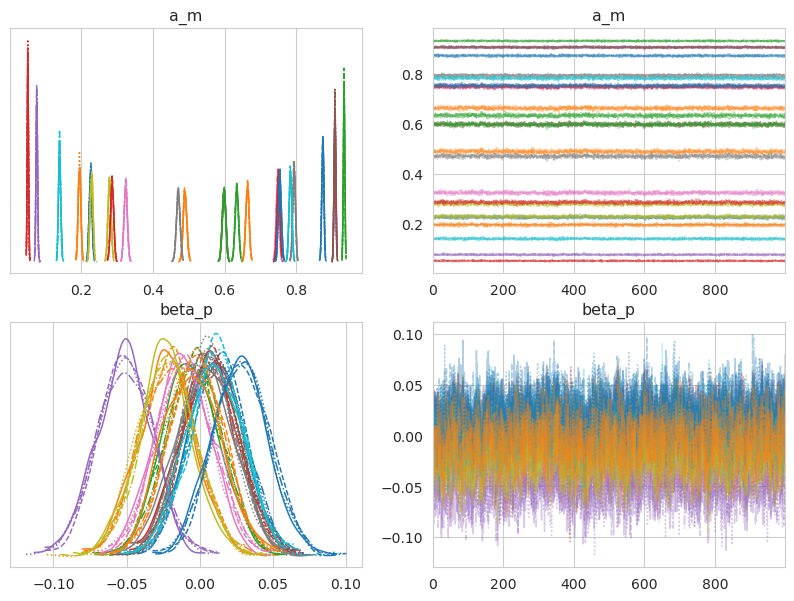

In [8]:
az.plot_trace(posterior_dict, var_names=['a_m', 'beta_p'], figsize=(10, 7))

In [22]:
az.to_netcdf(trace, "module_target_trace.nc")

'module_target_trace.nc'

In [13]:
import pymc as pm
import formulaic
import pandas as pd
import numpy as np

model_formula = 'Coverage ~ 0 + C(TargetModule) + C(TuningParameters, contr.treatment("NONE"))'
model_spec = formulaic.model_matrix(model_formula, data=data)
module_matrix = model_spec.rhs.iloc[:, :24]
parameter_matrix = model_spec.rhs.iloc[:, 24:]

model_formula = 'Coverage ~ 0 +  C(TargetModule) : C(TuningParameters)'
model_spec = formulaic.model_matrix(model_formula, data=data)

# Filter out columns that contain 'T.NONE' in their name
columns_to_drop = [col for col in model_spec.rhs.columns if 'T.NONE' in col]

# Drop the identified columns
model_spec.rhs.drop(columns=columns_to_drop, axis=1, inplace=True)
model_spec.rhs.iloc[:, 140:]

,C(TargetModule)[T.sanic.helpers]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.sanic.mixins.signals]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.thonny.plugins.pgzero_frontend]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.typesystem.tokenize.positional_validation]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.codetiming._timer]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.decorators]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.namedtupleutils]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.packages]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.setuputils.cmd]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.httpie.output.formatters.headers]:C(TuningParameters)[T.StatementInsertionProbability],...,C(TargetModule)[T.pymonet.maybe]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pymonet.validation]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pypara.accounting.journaling]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pytutils.lazy.lazy_import]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pytutils.python]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.config]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.helpers]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.mixins.signals]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.thonny.plugins.pgzero_frontend]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.typesystem.tokenize.positional_validation]:C(TuningParameters)[T.TournamentSize]
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
with pm.Model() as model:
    # Priors for the global intercept
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    
    # Standard deviation across groups
    sigma = pm.Exponential('sigma', 1)
    
    # Group-specific intercepts
    a_m = pm.Normal('a_m', mu=a_bar, sigma=sigma, shape=24)
    b_p = pm.Normal('b_p', mu=0, sigma = 0.5, shape= 12)
    g_mp = pm.Normal('g_mp', mu=0, sigma = 0.5, shape=288)
    
    # Deterministic transformations for logit(pi)
    logit_alpha = pm.math.dot(module_matrix, a_m)
    logit_beta = pm.math.dot(parameter_matrix, b_p)
    logit_gamma = pm.math.dot(model_spec.rhs, g_mp)
    combined = logit_alpha + logit_beta + logit_gamma

    # Link function - logistic
    p = pm.Deterministic('p', pm.math.sigmoid(combined))
    
    # Gamma distribution for theta - dispersion parameter
    theta = pm.Gamma('theta', alpha=2, beta=0.5)  # adjust alpha, beta to reflect your prior knowledge
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Beta('Y_obs', alpha=p*theta, beta=(1-p)*theta, observed=model_spec.lhs['Coverage'])
    
    # Sample from the model
    trace = pm.sample(1000, chains=4, return_inferencedata=True, progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 3 jobs)
NUTS: [a_bar, sigma, a_m, b_p, g_mp, theta]


Output()

ValueError: Not enough samples to build a trace.

In [7]:
import arviz as az

def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))


def log_odds_to_or(log_odds):
    return np.exp(log_odds)

# Create a dictionary for the posterior
posterior_dict = {
    'a_m': trace.posterior['a_m'].values,
    'a_bar': trace.posterior['a_bar'].values,
    'sigma': trace.posterior['sigma'].values
    
}

for key, value in posterior_dict.items():
    posterior_dict[key] = logit_to_probability(value)


posterior_dict['theta'] = trace.posterior['theta'].values
posterior_dict['b_p'] = trace.posterior['b_p'].values 
posterior_dict['g_mp'] = trace.posterior['g_mp'].values

# Create an InferenceData object
infdata = az.from_dict(posterior=posterior_dict)

# Generate a summary table with the mean and 89% HDI for all variables
summary = az.summary(infdata, hdi_prob=0.89)
summary

KeyError: 'sigma'

array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'beta_p'}>,
        <Axes: title={'center': 'beta_p'}>],
       [<Axes: title={'center': 'gamma_mp'}>,
        <Axes: title={'center': 'gamma_mp'}>]], dtype=object)

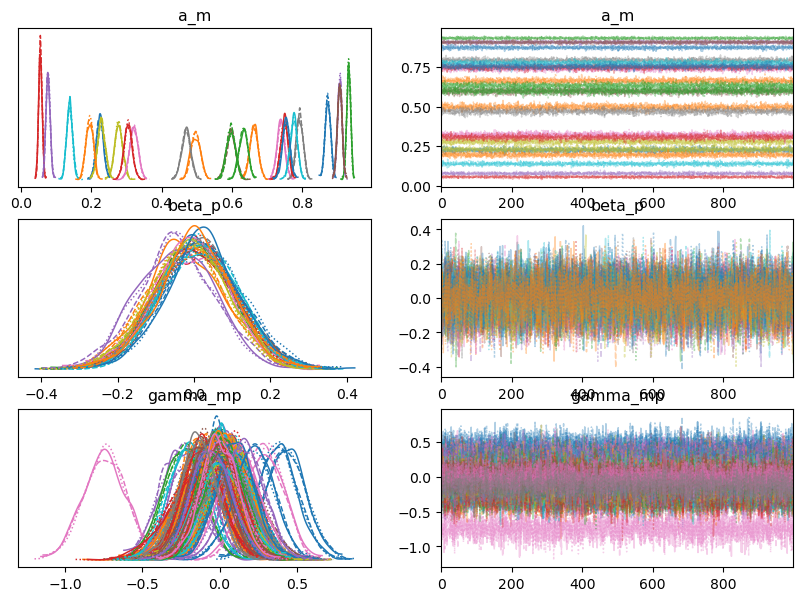

In [25]:
az.plot_trace(posterior_dict, var_names=['a_m', 'beta_p', 'gamma_mp'], figsize=(10, 7))

In [26]:
idata = az.to_netcdf(trace, 'module_parameter_iteraction.nc')

In [1]:
import pymc as pm
import formulaic
import pandas as pd
import numpy as np

data = pd.read_csv("../single_parameter/combined_data/statistics.csv")
data.head()


model_formula = 'Coverage ~ 0 + C(TargetModule) + C(TuningParameters, contr.treatment("NONE"))'
model_spec = formulaic.model_matrix(model_formula, data=data)
module_matrix = model_spec.rhs.iloc[:, :24]
parameter_matrix = model_spec.rhs.iloc[:, 24:]

model_formula = 'Coverage ~ 0 +  C(TargetModule) : C(TuningParameters)'
model_spec = formulaic.model_matrix(model_formula, data=data)

# Filter out columns that contain 'T.NONE' in their name
columns_to_drop = [col for col in model_spec.rhs.columns if 'T.NONE' in col]

# Drop the identified columns
model_spec.rhs.drop(columns=columns_to_drop, axis=1, inplace=True)
model_spec.rhs.iloc[:, 140:]


,C(TargetModule)[T.sanic.helpers]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.sanic.mixins.signals]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.thonny.plugins.pgzero_frontend]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.typesystem.tokenize.positional_validation]:C(TuningParameters)[T.RandomPerturbation],C(TargetModule)[T.codetiming._timer]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.decorators]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.namedtupleutils]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.packages]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.flutils.setuputils.cmd]:C(TuningParameters)[T.StatementInsertionProbability],C(TargetModule)[T.httpie.output.formatters.headers]:C(TuningParameters)[T.StatementInsertionProbability],...,C(TargetModule)[T.pymonet.maybe]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pymonet.validation]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pypara.accounting.journaling]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pytutils.lazy.lazy_import]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.pytutils.python]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.config]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.helpers]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.sanic.mixins.signals]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.thonny.plugins.pgzero_frontend]:C(TuningParameters)[T.TournamentSize],C(TargetModule)[T.typesystem.tokenize.positional_validation]:C(TuningParameters)[T.TournamentSize]
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9356,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9357,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
p_matrix_copy = parameter_matrix.copy()
iteraction_matrix_copy = model_spec.rhs.copy()

iteraction_to_parameter_matrix = iteraction_matrix_copy.T @ p_matrix_copy

iteraction_to_parameter_matrix = (iteraction_to_parameter_matrix > 0).astype(int)
iteraction_to_parameter_matrix @ np.array([0.3, 0.2, 0.654, 0.553, 0.432, 0.3467,
                                           0.1, 0.95, 0.32, 0.67, 0.43632, 0.9876])

C(TargetModule)[T.codetiming._timer]:C(TuningParameters)[T.ChangeParameterProbability]                0.3000
C(TargetModule)[T.flutils.decorators]:C(TuningParameters)[T.ChangeParameterProbability]               0.3000
C(TargetModule)[T.flutils.namedtupleutils]:C(TuningParameters)[T.ChangeParameterProbability]          0.3000
C(TargetModule)[T.flutils.packages]:C(TuningParameters)[T.ChangeParameterProbability]                 0.3000
C(TargetModule)[T.flutils.setuputils.cmd]:C(TuningParameters)[T.ChangeParameterProbability]           0.3000
                                                                                                       ...  
C(TargetModule)[T.sanic.config]:C(TuningParameters)[T.TournamentSize]                                 0.9876
C(TargetModule)[T.sanic.helpers]:C(TuningParameters)[T.TournamentSize]                                0.9876
C(TargetModule)[T.sanic.mixins.signals]:C(TuningParameters)[T.TournamentSize]                         0.9876
C(TargetModule)[T.t

In [3]:
with pm.Model() as model:
    # Priors for the global intercept
    a_bar = pm.Normal('a_bar', mu=0, sigma=1.5)
    sigma_a = pm.Exponential('sigma_a', 1)
    
    g_bar = pm.Normal('g_bar', mu=0, sigma = 0.5, shape= 12)
    sigma_g = pm.Exponential('sigma_g', 1)

    # Group-specific intercepts
    a_m = pm.Normal('a_m', mu=a_bar, sigma=sigma_a, shape=24)
    g_mp = pm.Normal('g_mp', mu=pm.math.dot(iteraction_to_parameter_matrix, g_bar), sigma = sigma_g, shape=288)
                                # (288,12)->(288,1)
    # Deterministic transformations for logit(pi)
    logit_alpha = pm.math.dot(module_matrix, a_m)
    logit_gamma = pm.math.dot(model_spec.rhs, g_mp)
    combined = logit_alpha + logit_gamma

    # Link function - logistic
    p = pm.Deterministic('p', pm.math.sigmoid(combined))
    
    # Gamma distribution for theta - dispersion parameter
    theta = pm.Gamma('theta', alpha=2, beta=0.5)  # adjust alpha, beta to reflect your prior knowledge
    
    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Beta('Y_obs', alpha=p*theta, beta=(1-p)*theta, observed=model_spec.lhs['Coverage'])

    
    # Sample from the model
    trace = pm.sample(2000, chains=4, return_inferencedata=True, progressbar=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a_bar, sigma_a, g_bar, sigma_g, a_m, g_mp, theta]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1142 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [11]:
import arviz as az

def logit_to_probability(logit_vals):
    """Apply logistic transformation to logit values."""
    return 1 / (1 + np.exp(-logit_vals))


def log_odds_to_or(log_odds):
    return np.exp(log_odds)

# Create a dictionary for the posterior
posterior_dict = {
    'a_m': trace.posterior['a_m'].values,
    'a_bar': trace.posterior['a_bar'].values,
    'sigma': trace.posterior['sigma_a'].values
    
}

for key, value in posterior_dict.items():
    posterior_dict[key] = logit_to_probability(value)


posterior_dict['theta'] = trace.posterior['theta'].values
posterior_dict['g_mp'] = trace.posterior['g_mp'].values
posterior_dict['g_bar'] = trace.posterior['g_bar'].values
posterior_dict['sigma_g'] = trace.posterior['sigma_g'].values

# Create an InferenceData object
infdata = az.from_dict(posterior=posterior_dict)

# Generate a summary table with the mean and 89% HDI for all variables
summary = az.summary(infdata, hdi_prob=0.89)
summary

,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a_m[0],0.873,0.003,0.868,0.878,0.000,0.000,432.0,1914.0,1.01
a_m[1],0.663,0.005,0.654,0.671,0.000,0.000,234.0,786.0,1.02
a_m[2],0.933,0.002,0.929,0.936,0.000,0.000,628.0,2193.0,1.01
a_m[3],0.052,0.002,0.049,0.054,0.000,0.000,662.0,2274.0,1.00
a_m[4],0.076,0.002,0.073,0.080,0.000,0.000,519.0,1827.0,1.01
...,...,...,...,...,...,...,...,...,...
g_bar[8],-0.018,0.022,-0.053,0.015,0.002,0.001,183.0,549.0,1.02
g_bar[9],0.015,0.021,-0.018,0.049,0.002,0.001,188.0,647.0,1.02
g_bar[10],0.033,0.021,-0.002,0.066,0.002,0.001,175.0,806.0,1.03
g_bar[11],0.002,0.021,-0.031,0.037,0.002,0.001,187.0,656.0,1.01


array([[<Axes: title={'center': 'a_m'}>, <Axes: title={'center': 'a_m'}>],
       [<Axes: title={'center': 'g_mp'}>,
        <Axes: title={'center': 'g_mp'}>],
       [<Axes: title={'center': 'g_bar'}>,
        <Axes: title={'center': 'g_bar'}>]], dtype=object)

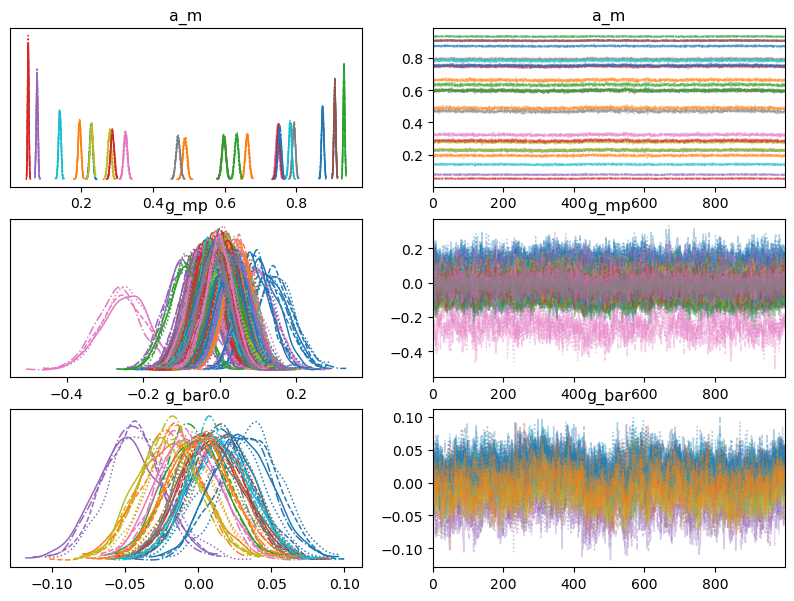

In [6]:
az.plot_trace(posterior_dict, var_names=['a_m', 'g_mp', 'g_bar'], figsize=(10, 7))

In [9]:
idata = az.to_netcdf(trace, 'module_iteraction.nc')